In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("swiggy.csv")

In [3]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [4]:
df.shape

(148541, 11)

In [5]:
df[df.duplicated()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu


In [6]:
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [7]:
critical_columns = ['name', 'rating', 'rating_count', 'cost', 'cuisine']
df_new = df.dropna(subset=critical_columns)

In [8]:
rows_dropped = df.shape[0] - df_new.shape[0]
print(f"Rows dropped due to missing values: {rows_dropped}")

Rows dropped due to missing values: 143


In [7]:
df_new.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as 'cleaned_data.csv'")

Cleaned data saved as 'cleaned_data.csv'


In [9]:
df = df_new

In [10]:
df.shape

(148398, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148398 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148398 non-null  int64 
 1   name          148398 non-null  object
 2   city          148398 non-null  object
 3   rating        148398 non-null  object
 4   rating_count  148398 non-null  object
 5   cost          148398 non-null  object
 6   cuisine       148398 non-null  object
 7   lic_no        148255 non-null  object
 8   link          148398 non-null  object
 9   address       148398 non-null  object
 10  menu          148398 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [49]:
df.sample()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
60199,358070,Delhi Momo Co,"Rajouri Garden,Delhi",--,Too Few Ratings,₹ 300,"Chinese,Tandoor",license,https://www.swiggy.com/restaurants/delhi-momo-...,"Delhi Momo Co, PROPERTY BEARING NO. 17/188, ...",Menu/358070.json


In [12]:
df['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', '1.0', '1.2', '1.7'], dtype=object)

In [13]:
df_new['rating'] = df_new['rating'].replace('--', '0')
df_new['rating'] = pd.to_numeric(df_new['rating'], errors='coerce')
print(df_new['rating'].dtype)

float64


In [10]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [14]:
df['rating'] = df['rating'].replace('--', '0')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 'rating_count' columns conversion

df['rating_count'] = df['rating_count'].replace("Too Few Ratings", "0")
df['rating_count'] = df['rating_count'].str.replace("+", "", regex=False)
df['rating_count'] = df['rating_count'].str.replace("ratings", "", regex=False).str.strip()
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
print(df['rating_count'].unique())

[  0.  50. 100.  20. 500.  nan]


In [15]:
df['cost'] = df['cost'].str.replace("₹", "", regex=False).str.replace(",", "").str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [16]:
print(df.isna().sum())

id                 0
name               0
city               0
rating             0
rating_count    2852
cost               0
cuisine            0
lic_no           143
link               0
address            0
menu               0
dtype: int64


In [17]:
df['rating_count'] = df['rating_count'].fillna(0)

In [18]:
df['rating_count'].isna().sum()

np.int64(0)

In [19]:
# Dropping 'lic_no' , 'link, address, and menu' columns for display in the Streamlit app.
df = df.drop(columns=['lic_no','link','address','menu'])

In [21]:
df.sample()

,id,name,city,rating,rating_count,cost,cuisine
113777,103748,The Pancake Story,"Bajaj Nagar,Nagpur",4.5,50.0,300,"Bakery,Desserts"


In [22]:
df.set_index('id', inplace=True)

In [23]:
# extracting main city
df['city'] = df['city'].apply(lambda x: x.split(',')[-1].strip())
print(df['city'].unique())

['Abohar' 'Adilabad' 'Adityapur' 'Adoni' 'Agartala' 'Agra' 'Ahmedabad'
 'Ahmednagar' 'Aizawl' 'Ajmer' 'Akola' 'Alappuzha' 'Aligarh' 'Alipurduar'
 'Allahabad' 'Alwar' 'Ambala' 'Ambikapur' 'Ambur' 'Amravati' 'Amreli'
 'Amritsar' 'Anand' 'Anantapur' 'Ankleshwar' 'Arakkonam' 'Arambagh'
 'Arrah' 'Aruppukottai' 'Asansol' 'Aurangabad' 'Aurangabad_bihar'
 'Azamgarh' 'Baddi' 'Bagalkot' 'Bagdogra' 'Bahadurgarh' 'Bahraich'
 'Balaghat' 'Balangir' 'Balasore' 'Ballari' 'Balrampur' 'Balurghat'
 'Banda' 'Bangalore' 'Bantwal' 'Bapatlachirala' 'Baramati' 'Baran'
 'Bardhaman' 'Bardoli' 'Bareilly' 'Barmer' 'Barnala' 'Barshi' 'Barwani'
 'Basirhat' 'Basti' 'Batala' 'Bathinda' 'Beawar' 'Beed' 'Begusarai'
 'Bela-pratapgarh' 'Belgaum' 'Berhampore' 'Berhampur' 'Bettiah' 'Betul'
 'Bhadohi' 'Bhadrachalam' 'Bhagalpur' 'Bhandara' 'Bharabanki' 'Bharatpur'
 'Bharuch' 'Bhatkal' 'Bhavnagar' 'Bhawanipatna' 'Bhilai' 'Bhilwara'
 'Bhimavaram' 'Bhind' 'Bhiwadi' 'Bhiwani' 'Bhopal' 'Bhubaneswar' 'Bhuj'
 'Bhusawal' 'Bidar' 'Bi

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
# Selecting features for encoding and modeling
df_model = df[['name','city', 'cuisine', 'rating', 'rating_count', 'cost']].copy()

# Label Encoding
le = LabelEncoder()
df_model['name_encoded'] = le.fit_transform(df['name'])

with open("name_label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# One-Hot Encoding: city & cuisine
categorical_cols = ['city', 'cuisine']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform
encoded_array = encoder.fit_transform(df_model[categorical_cols])

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# DataFrame of encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Adding back numerical columns including name_encoded
numerical_df = df_model[['name_encoded', 'rating', 'rating_count', 'cost']].reset_index(drop=True)
final_encoded_df = pd.concat([encoded_df, numerical_df], axis=1)


final_encoded_df.to_csv("encoded_data.csv", index=False)
print("✅ Encoded dataset saved as 'encoded_data.csv'")

✅ Encoded dataset saved as 'encoded_data.csv'


In [ ]:
final_encoded_df = pd.concat([encoded_df, numerical_df], axis=1)

In [ ]:
df_model = df[['name','city', 'cuisine', 'rating', 'rating_count', 'cost']].copy()

# To ensure final_encoded_df has same number of rows and same order
final_encoded_df.index = df.index  

In [ ]:
df = pd.read_csv("cleaned_data.csv")
final_encoded_dfencoded_df = pd.read_csv("encoded_data.csv")

# Checking row counts
if df.shape[0] == encoded_df.shape[0]:
    print("✅ Row count matches.")
else:
    print("❌ Row count mismatch!")

# Checking index match
if (df.index == encoded_df.index).all():
    print("✅ Index match confirmed.")
else:
    print("ℹ️ Index mismatch. Resetting index...")
    df.reset_index(drop=True, inplace=True)
    encoded_df.reset_index(drop=True, inplace=True)
    print("✅ Index reset and matched.")

✅ Row count matches.
✅ Index match confirmed.


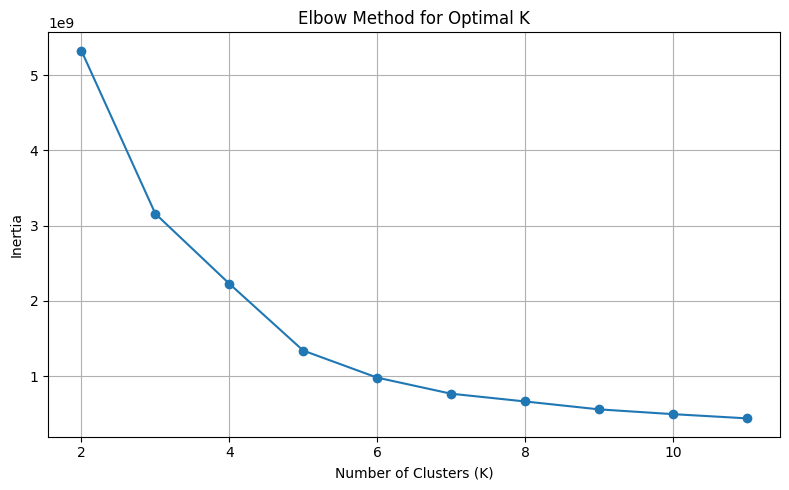

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

encoded_df = pd.read_csv("encoded_data.csv")

if 'name_encoded' in encoded_df.columns:
    encoded_df = encoded_df.drop(columns=['name_encoded'])
    
# Elbow Method to determine optimal K
inertia = []
k_range = range(2, 12)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(encoded_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow_plot.png")
plt.show()


In [25]:
from sklearn.metrics import silhouette_score


In [ ]:
from sklearn.utils import resample

# Sampling the dataset to speed up computation
X_sample = resample(encoded_df, n_samples=50000, random_state=42)

# KMeans on the sample
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_sample)

# silhouette score
score = silhouette_score(X_sample, labels)
print(f"Silhouette Score for K=5: {score:.4f}")

Silhouette Score for K=5: 0.3971


In [13]:
for k in [4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    print(f"K={k} => Silhouette Score: {score:.4f}")


K=4 => Silhouette Score: 0.5840
K=5 => Silhouette Score: 0.3971
K=6 => Silhouette Score: 0.4830


In [ ]:
# Reading encoded_data.csv in manageable chunks
chunk_list = []
chunksize = 5000

for chunk in pd.read_csv("encoded_data.csv", chunksize=chunksize):
    chunk_list.append(chunk)

# Combine chunks into a single DataFrame
encoded_df = pd.concat(chunk_list, ignore_index=True)

In [ ]:
# Drop 'name_encoded' column if it exists 
if 'name_encoded' in encoded_df.columns:
    encoded_df = encoded_df.drop(columns=['name_encoded'])

# Final K-Means Clustering with optimal K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(encoded_df)

# Save as pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ Final K-Means model trained and saved as 'kmeans_model.pkl'")


✅ Final K-Means model trained and saved as 'kmeans_model.pkl'


In [ ]:
# Parameters
chunksize = 5000

# Load cleaned dataset
df_clean = pd.read_csv("cleaned_data.csv")

# Initialize the cluster column
df_clean['cluster'] = -1

# Load pre-trained KMeans model
with open("kmeans_model.pkl", "rb") as f:
    kmeans = pickle.load(f)

# Drop 'name_encoded' during prediction if it exists
row_start = 0
for chunk in pd.read_csv("encoded_data.csv", chunksize=chunksize):
    if 'name_encoded' in chunk.columns:
        chunk = chunk.drop(columns=['name_encoded'])

    # Predict cluster labels for the chunk
    preds = kmeans.predict(chunk)

    # Assign corresponding rows in df_clean
    df_clean.iloc[row_start:row_start + len(preds), df_clean.columns.get_loc('cluster')] = preds
    row_start += len(preds)

# recommendation function
def recommend_by_cluster(restaurant_name, top_n=5):
    matches = df_clean[df_clean['name'].str.lower() == restaurant_name.lower()]
    if matches.empty:
        return f"❌ Restaurant '{restaurant_name}' not found."

    cluster_id = matches.iloc[0]['cluster']
    cluster_group = df_clean[df_clean['cluster'] == cluster_id]

    # Exclude input restaurant
    recommendations = cluster_group[cluster_group['name'].str.lower() != restaurant_name.lower()]
    
    return recommendations[['name', 'city', 'cuisine', 'rating']].head(top_n)

# Example 
result = recommend_by_cluster("Domino's Pizza")
print(result)


                name    city                     cuisine rating
0     AB FOODS POINT  Abohar            Beverages,Pizzas     --
1  Janta Sweet House  Abohar               Sweets,Bakery    4.4
2  theka coffee desi  Abohar                   Beverages    3.8
3          Singh Hut  Abohar            Fast Food,Indian    3.7
4      GRILL MASTERS  Abohar  Italian-American,Fast Food     --


In [ ]:
df_clean.to_csv("clustered_data.csv", index=False)

print("✅ Clustered data saved to 'clustered_data.csv'")

✅ Clustered data saved to 'clustered_data.csv'


In [ ]:
# clustered_data pickle 
with open("clustered_data.pkl", "wb") as f:
    pickle.dump(df_clean, f)

print("✅ Clustered data saved to 'clustered_data.pkl'")

✅ Clustered data saved to 'clustered_data.pkl'


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
import joblib

df = pd.read_csv("cleaned_data.csv")
df['cost'] = df['cost'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce').fillna(0).astype(int)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0.0)

# Label encoder
le_city = LabelEncoder()
le_cuisine = LabelEncoder()
df['city_enc'] = le_city.fit_transform(df['city'])
df['cuisine_enc'] = le_cuisine.fit_transform(df['cuisine'])

# Stacking all inputs as 2D arrays
X = np.hstack((
    df['city_enc'].values.reshape(-1, 1),
    df['cuisine_enc'].values.reshape(-1, 1),
    df[['rating', 'cost']].values
))

# Training KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Saving models
joblib.dump(le_city, 'le_city.joblib')
joblib.dump(le_cuisine, 'le_cuisine.joblib')
joblib.dump(kmeans, 'kmeans_model_fixed.joblib')


['kmeans_model_fixed.joblib']